Construindo um grafo automaticamente
====================================



## Introdução



Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso `grafo computacional`. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor $y$. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o `backpropagation`.



## Importações



In [1]:
from funcoes import plota_grafo

## Código e discussão



### Primeiros passos



A base de tudo será uma classe chamada `Valor`. Vamos começar pelo básico!



In [2]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

Vamos testar nossa classe!



In [3]:
x1 = Valor(60)
print(x1)
print(x1.data)

Valor(data=60)
60


### Os dunders `__add__` e `__mul__`



Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe `Valor`.



In [4]:
a = Valor(10) #self.data
b = Valor(5)

In [5]:
#print(a + b)

In [6]:
#print(a * b)

Ué&#x2026; porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra `Valor`&#x2026;

Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores `+` e `*`. Quem faz isso são os dunders `__add__` e `__mul__`.



In [7]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        saida = Valor(self.data + outro_valor.data)
        return saida

    def __mul__(self, outro_valor):
        saida = Valor(self.data * outro_valor.data)
        return saida

Vamos testar!



### Registrando os progenitores



Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.



In [8]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

Vamos testar!



In [9]:
a = Valor(10)
b = Valor(5)

c = a + b

print(c.progenitor)

(Valor(data=10), Valor(data=5))


### Registrando o operador mãe



Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.



In [10]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [11]:
a = Valor(10)
b = Valor(5)

c = a + b

print(c)
print(c.progenitor)
print(c.operador_mae)

Valor(data=15)
(Valor(data=10), Valor(data=5))
+


### Plotando o primeiro grafo



Vamos plotar nosso primeiro grafo!



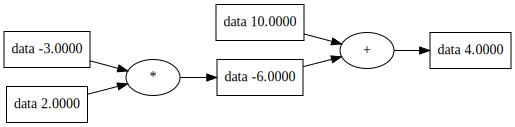

In [12]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

plota_grafo(e)

### Registrando o rótulo



Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.



In [13]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [14]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

d.rotulo = "d"
e.rotulo = "e"

grafo = plota_grafo(e)
print(grafo)

digraph {
	graph [rankdir=LR]
	1790091277360 [label="{ a | data 2.0000 }" shape=record]
	1790091264592 [label="{ c | data 10.0000 }" shape=record]
	1790091264688 [label="{ e | data 4.0000 }" shape=record]
	"1790091264688+" [label="+"]
	"1790091264688+" -> 1790091264688
	1790091267520 [label="{ d | data -6.0000 }" shape=record]
	"1790091267520*" [label="*"]
	"1790091267520*" -> 1790091267520
	1790091278800 [label="{ b | data -3.0000 }" shape=record]
	1790091267520 -> "1790091264688+"
	1790091278800 -> "1790091267520*"
	1790091277360 -> "1790091267520*"
	1790091264592 -> "1790091264688+"
}



### Refazendo o grafo que fizemos na aula anterior



Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!



In [15]:
x1 = Valor(60, rotulo = "x1")
x2 = Valor(24, rotulo = "x2")
w1 = Valor(10, rotulo = "w1")
w2 = Valor(5, rotulo = "w2")
w3 = Valor(2, rotulo = "w3")
b = Valor(7, rotulo = "b")

s1 = x1 * w1
s1.rotulo = "s1"

s2 = x2 * w2
s2.rotulo = "s2"

n = s1 + s2
n.rotulo = "n"

k = n + b
k.rotulo = "k"

y = k * w3
y.rotulo = "y"

grafo = plota_grafo(y)
print(grafo)

digraph {
	graph [rankdir=LR]
	1790091164688 [label="{ k | data 727.0000 }" shape=record]
	"1790091164688+" [label="+"]
	"1790091164688+" -> 1790091164688
	1790090646096 [label="{ n | data 720.0000 }" shape=record]
	"1790090646096+" [label="+"]
	"1790090646096+" -> 1790090646096
	1790091222176 [label="{ w3 | data 2.0000 }" shape=record]
	1790090646816 [label="{ s1 | data 600.0000 }" shape=record]
	"1790090646816*" [label="*"]
	"1790090646816*" -> 1790090646816
	1790090649408 [label="{ y | data 1454.0000 }" shape=record]
	"1790090649408*" [label="*"]
	"1790090649408*" -> 1790090649408
	1790091221312 [label="{ w2 | data 5.0000 }" shape=record]
	1790091219344 [label="{ x2 | data 24.0000 }" shape=record]
	1790090646432 [label="{ s2 | data 120.0000 }" shape=record]
	"1790090646432*" [label="*"]
	"1790090646432*" -> 1790090646432
	1790091221936 [label="{ w1 | data 10.0000 }" shape=record]
	1790091221456 [label="{ x1 | data 60.0000 }" shape=record]
	1790091222512 [label="{ b | data 7.0000 }" 

# Discussão
Esse experimento mostra como implementar uma classe em Python para construir um grafo computacional. A classe `Valor` tem como objetivo armazenar valores e informações sobre seus progenitores, o operador que foi usado para gerar o vértice e um rótulo.

No código, há a definição dos métodos especiais `repr`, `add` e `mul`. O método `repr` é usado para representar o objeto "Valor" como uma string, quando é chamado a função print. Os métodos add e mul sobrecarregam os operadores "+" e "*", respectivamente, permitindo a adição e multiplicação de objetos criados com a classe "Valor".

Em seguida, há uma atualização da classe, incluindo informações sobre o operador mãe e rótulo. O operador mãe é o operador usado para gerar o vértice, enquanto o rótulo é uma informação que facilita a leitura do grafo computacional.

Por fim, há a demonstração do uso da classe para a construção de um grafo computacional e sua plotamos o grafo por meio da função "plota_grafo".

## Conclusão



Nesse experimento, descrevemos uma das etapas dos algoritmos de redes neurais, o foward propagation, em forma de grafos! Isso é muito interessante porque podemos visualizar esse processo de forma simplificada e "ilustrada". 
O mais interessante é que utilizamos o conceito que aprendemos no experimento anterior de classes para criar esses grafos. 

## Playground

